# Analysis of Titanic data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

## Load data from CSV

In [2]:
titanic_df=pd.read_csv('titanic_data.csv')

In [3]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Cleaning 
- We realise that there are redundant columns in the dataframe which may not be useful for analysis
- Store a copy of the data frame before cleaning it. The columns which we feel not necessary now might be required later.
- The Ticket column here is redundant, as it doesn't really serve the need for any analysis
- The Cabin column also seems redundant

In [4]:
titanic_backup = titanic_df.copy()             
del titanic_df['Ticket']
del titanic_df['Cabin']

In [5]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## Question 1 : What is the Survival rate ?
- Survival rate is total number of survivals/total number of passengers expressed in percentage.

In [6]:
total_count=titanic_df['Survived'].count()

In [7]:
total_count

891

In [8]:
total_survived=(float)(titanic_df['Survived'].sum())

In [9]:
total_survived

342.0

In [10]:
survival_rate=(total_survived/total_count)*100

In [11]:
print str(round(survival_rate, 2))+'%'+' is the survival rate of titanic'

38.38% is the survival rate of titanic


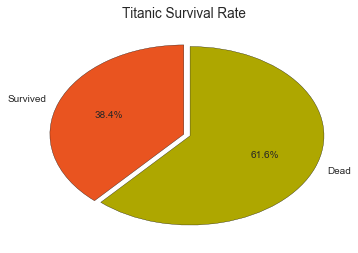

In [12]:
plt.pie([total_survived, total_count-total_survived], explode=(0,0.05), labels=['Survived','Dead'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Titanic Survival Rate',fontsize=13.5)
plt.show()

- The survival rate clearly tells that much more then 50% of the passengers (i.e, 61.6%) died during the tragedy. 

In [13]:
# A function to group the data in the data frame upon the specified column
def group_my_data(group_by,data_frame):
    total_count_for_group = data_frame.groupby(group_by).count()['PassengerId']
    total_survival = data_frame.groupby(group_by).sum()['Survived']
    return total_survival/total_count_for_group

## Question 2 : Did the class of the person affect his chances of being saved ?

In [14]:
survival_wrt_class=group_my_data('Pclass',titanic_df)*100

In [15]:
survival_wrt_class

Pclass
1    62.962963
2    47.282609
3    24.236253
dtype: float64

In [16]:
print str(round(survival_wrt_class[1],2))+'%'+' of the 1st class passengers were saved'
print str(round(survival_wrt_class[2],2))+'%'+' of the 2st class passengers were saved'
print str(round(survival_wrt_class[3],2))+'%'+' of the 3st class passengers were saved'

62.96% of the 1st class passengers were saved
47.28% of the 2st class passengers were saved
24.24% of the 3st class passengers were saved


In [17]:
b1=pd.Series(survival_wrt_class)
b2=100-b1

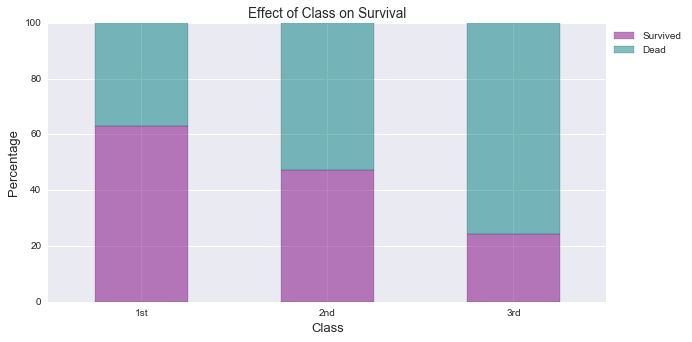

In [18]:
f, ax1 = plt.subplots(1, figsize=(10,5))
bar_width = 0.5
bar_l = [i+1 for i in range(3)] 
tick_pos = [i+(bar_width/2) for i in bar_l] 
ax1.bar(bar_l, b1, width=bar_width, label='Survived', alpha=0.5, color='#800080')
ax1.bar(bar_l, b2, width=bar_width, bottom=b1, label='Dead', alpha=0.5, color='#008080')
plt.xticks(tick_pos, ['1st','2nd','3rd'])
ax1.set_ylabel("Percentage",fontsize=13)
ax1.set_xlabel("Class",fontsize=13)
plt.title('Effect of Class on Survival',fontsize=13.5)

plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
pad_edge=plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])


- The results clearly specify that most of the 1st class passengers were saved.
- That wasn't the case with 2nd and 3rd class. Less than 50% of them were saved.

## Question 3 : Were women given priority over men during survival operation ?

In [19]:
survival_wrt_sex=group_my_data('Sex',titanic_df)*100

In [20]:
survival_wrt_sex

Sex
female    74.203822
male      18.890815
dtype: float64

In [21]:
print str(round(survival_wrt_sex['male'],2))+'%'+' of male passengers were saved'
print str(round(survival_wrt_sex['female'],2))+'%'+' of female passengers were saved'


18.89% of male passengers were saved
74.2% of female passengers were saved


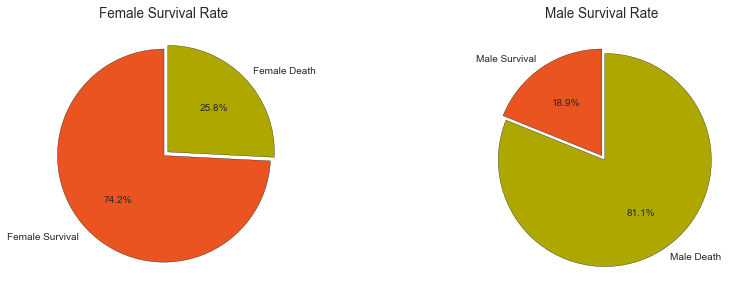

In [22]:
the_grid = GridSpec(1,2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie([survival_wrt_sex['female'],100-survival_wrt_sex['female']], explode=(0,0.05), labels=['Female Survival','Female Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Female Survival Rate',fontsize=13.5)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie([survival_wrt_sex['male'],100-survival_wrt_sex['male']], explode=(0,0.05), labels=['Male Survival','Male Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Male Survival Rate',fontsize=13.5)

plt.tight_layout()
plt.subplots_adjust(right=2)
plt.show()


- The results imply that majority of the women were saved (around 3/4th of the women passengers were saved)
- Only 18.9% of the male passengers were saved

## Question 4 : Combined effect of gender and class on survival.

In [23]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [24]:
total_sex_class_count = titanic_df.groupby(['Sex','Pclass']).count()['PassengerId']

In [25]:
total_sex_class_count

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: PassengerId, dtype: int64

In [26]:
sex_class_survival = titanic_df.groupby(['Sex','Pclass']).sum()['Survived']

In [27]:
sex_class_survival

Sex     Pclass
female  1         91
        2         70
        3         72
male    1         45
        2         17
        3         47
Name: Survived, dtype: int64

In [28]:
sex_class_survival_rate = (sex_class_survival/total_sex_class_count)*100

In [29]:
sex_class_survival_rate

Sex     Pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
dtype: float64

In [30]:
print str(round(sex_class_survival_rate['male',1],2))+'%'+' of 1st class male passengers were saved'
print str(round(sex_class_survival_rate['male',2],2))+'%'+' of 2nd class male passengers were saved'
print str(round(sex_class_survival_rate['male',3],2))+'%'+' of 3nd class male passengers were saved\n'
print str(round(sex_class_survival_rate['female',1],2))+'%'+' of 1nd class female passengers were saved'
print str(round(sex_class_survival_rate['female',2],2))+'%'+' of 2nd class female passengers were saved'
print str(round(sex_class_survival_rate['female',3],2))+'% '+' of 3nd class female passengers were saved'

36.89% of 1st class male passengers were saved
15.74% of 2nd class male passengers were saved
13.54% of 3nd class male passengers were saved

96.81% of 1nd class female passengers were saved
92.11% of 2nd class female passengers were saved
50.0%  of 3nd class female passengers were saved


In [31]:
sex_class_survival_rate['female',1]

96.808510638297875

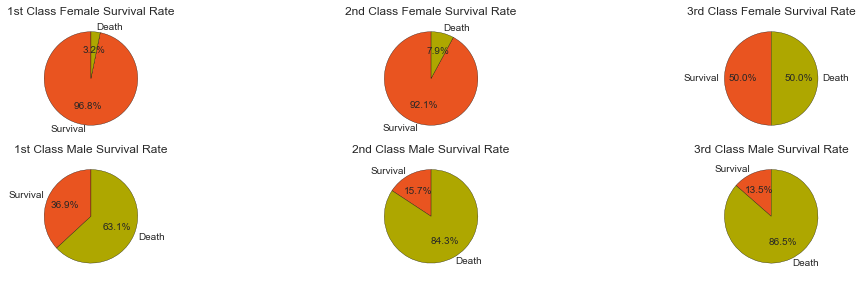

In [32]:
the_grid = GridSpec(2,3)

plt.subplot(the_grid[0, 0], aspect=1)
plt.pie([sex_class_survival_rate['female',1],100-sex_class_survival_rate['female',1]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('1st Class Female Survival Rate')

plt.subplot(the_grid[0, 1], aspect=1)
plt.pie([sex_class_survival_rate['female',2],100-sex_class_survival_rate['female',2]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('2nd Class Female Survival Rate')

plt.subplot(the_grid[0, 2], aspect=1)
plt.pie([sex_class_survival_rate['female',3],100-sex_class_survival_rate['female',3]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('3rd Class Female Survival Rate')

plt.subplot(the_grid[1, 0], aspect=1)
plt.pie([sex_class_survival_rate['male',1],100-sex_class_survival_rate['male',1]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('1st Class Male Survival Rate')

plt.subplot(the_grid[1, 1], aspect=1)
plt.pie([sex_class_survival_rate['male',2],100-sex_class_survival_rate['male',2]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('2nd Class Male Survival Rate')

plt.subplot(the_grid[1, 2], aspect=1)
plt.pie([sex_class_survival_rate['male',3],100-sex_class_survival_rate['male',3]], labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('3rd Class Male Survival Rate')

plt.tight_layout()
plt.subplots_adjust(right=2)
plt.show()

- 6 pie charts explain the survival scenarios of male and female from different classes of the society. 
- Female from 1st, 2nd and 3rd class were saved on a greater ratio with respect to males from the corresponding class. 
- But as the class went from 1st to 3rd the survival rate of male/female in that class also came down

## Question 5 : Were children given priority over  ?

In [33]:
tit_temp=titanic_df.copy()

In [34]:
def age_group(age):
    if age<18:
        return 'Child'
    else:
        return 'Others'

In [35]:
tit_temp['Age']=tit_temp['Age'].apply(age_group)
tit_temp=tit_temp.rename(columns={'Age':'Age_Group'})

In [36]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [37]:
survival_wrt_age=group_my_data('Age_Group',tit_temp)*100

In [38]:
survival_wrt_age

Age_Group
Child     53.982301
Others    36.118252
dtype: float64

In [39]:
print str(round(survival_wrt_age['Child'],2))+'%'+' of the children were saved'
print str(round(survival_wrt_age['Others'],2))+'%'+' of others were saved'

53.98% of the children were saved
36.12% of others were saved


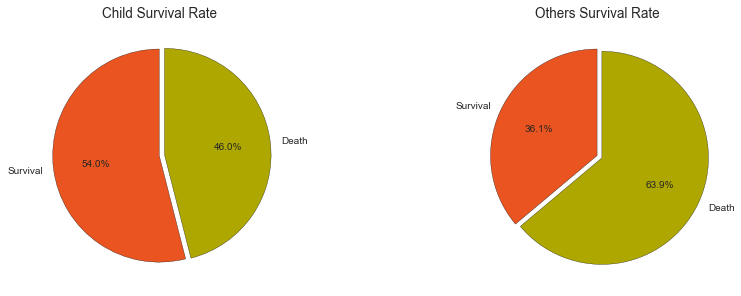

In [40]:
the_grid = GridSpec(1,2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie([survival_wrt_age['Child'],100-survival_wrt_age['Child']], explode=(0,0.05), labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Child Survival Rate',fontsize=13.5)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie([survival_wrt_age['Others'],100-survival_wrt_age['Others']], explode=(0,0.05), labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Others Survival Rate',fontsize=13.5)

plt.tight_layout()
plt.subplots_adjust(right=2)
plt.show()


- The result shows that Children were saved. But not to that extent. 
- Only 54% of the children were saved. 
- The rate is still high in comparison to others survival rate. 

## Question 6 : Women and Children First protocol was followed ?

In [41]:
tit_temp['Women_Child_OR_Male']= 'Male'

In [42]:
for i in range(0,len(tit_temp)):
    if tit_temp.loc[i,'Sex']=='female' or tit_temp.loc[i,'Age_Group']=='Child':
        tit_temp.loc[i,'Women_Child_OR_Male']='Women_Child'

In [43]:
survival_female_child=group_my_data('Women_Child_OR_Male',tit_temp)*100

In [44]:
survival_female_child

Women_Child_OR_Male
Male           16.570328
Women_Child    68.817204
dtype: float64

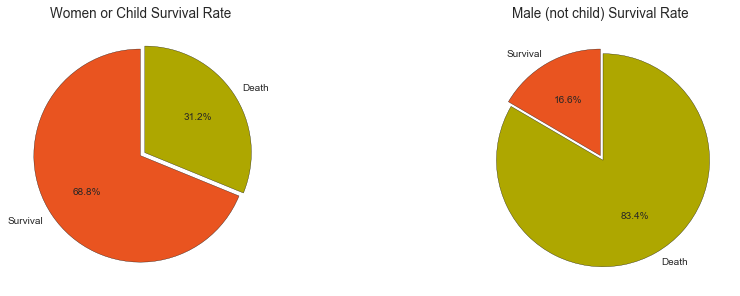

In [45]:
the_grid = GridSpec(1,2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie([survival_female_child['Women_Child'],100-survival_female_child['Women_Child']], explode=(0,0.05), labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Women or Child Survival Rate',fontsize=13.5)


plt.subplot(the_grid[0, 1], aspect=1)
plt.pie([survival_female_child['Male'],100-survival_female_child['Male']], explode=(0,0.05), labels=['Survival','Death'],colors=['#E95420','#AEA700'],autopct='%1.1f%%',startangle=90)
plt.title('Male (not child) Survival Rate',fontsize=13.5)

plt.tight_layout()
plt.subplots_adjust(right=2)
plt.show()

- It is important that during any accident Women and Child first protocol is followed. 
- It was followed to a very great extent in titanic as 68.8% of the women/children were saved during the accident 
- This value is very high when comapred to only 16.6% of males (who aren't children)

## Question 7 : Are passenger class and fare related ?

In [46]:
def correlation(x,y):
    std_x=(x-x.mean())/x.std(ddof=0)    
    std_y=(y-y.mean())/y.std(ddof=0)    
    return (std_x * std_y).mean()

In [47]:
correlation(titanic_df['Fare'],titanic_df['Pclass'])

-0.5494996199439044

This indicates that they are related with the below relation: 
- With increase in Pclass i.e, from class 1 to 3 , the fare reduces. 

In [48]:
titanic_df.groupby('Pclass').mean()['Fare']

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

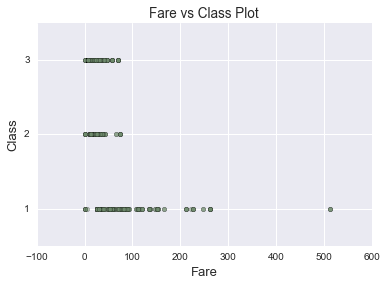

In [49]:
plt.scatter(titanic_df['Fare'],titanic_df['Pclass'],c=np.random.rand(3), alpha=0.5)
plt.yticks([1,2,3])
plt.xlabel('Fare',fontsize=13)
plt.ylabel('Class',fontsize=13)
plt.title('Fare vs Class Plot',fontsize=13.5)

- Implies that the fare and class of the passenger are dircetly proportional. 
- We also noted in the previous cases that passengers from high class were saved more. 

## Question 8 : Will family size effect survival rate ?

In [50]:
tit_temp['Family']=tit_temp['SibSp']+tit_temp['Parch']

In [51]:
tit_temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age_Group,SibSp,Parch,Fare,Embarked,Women_Child_OR_Male,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,Others,1,0,7.2500,S,Male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Others,1,0,71.2833,C,Women_Child,1
2,3,1,3,"Heikkinen, Miss. Laina",female,Others,0,0,7.9250,S,Women_Child,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Others,1,0,53.1000,S,Women_Child,1
4,5,0,3,"Allen, Mr. William Henry",male,Others,0,0,8.0500,S,Male,0


In [52]:
survival_wrt_family_size = group_my_data('Family',tit_temp)*100

In [53]:
survival_wrt_family_size

Family
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
dtype: float64

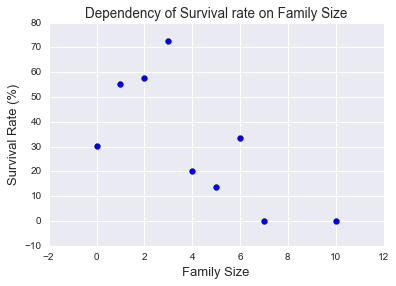

In [54]:
plt.scatter(survival_wrt_family_size.index,survival_wrt_family_size,s=35)
plt.xlabel('Family Size',fontsize=13)
plt.ylabel('Survival Rate (%)',fontsize=13)
plt.title('Dependency of Survival rate on Family Size',fontsize=13.5)

- The effect of family size on the survival rate is visible for part of the data set
- Those passengers who had large family size couldn't save themself. Reason might be that they wanted to save there family first. 
- Those with family size 7 and 10 have a survival rate which is almost 0.

## Question 9 : Did the point of boarding of the passenger effect his survival ?
- Did the passengers who boarded at the last embarkment have more chances of being alive ? 
- Considering the fact that those who boarded earlier wouldn't have had enough time to escape

In [55]:
survival_wrt_embark=group_my_data('Embarked',titanic_df)*100

In [56]:
survival_wrt_embark

Embarked
C    55.357143
Q    38.961039
S    33.695652
dtype: float64

- Implies more then 50% of the passengers boarding at Cherbourg were saved. 
- More then 30% of passengers from Queenstown and Southampton were saved.
- Reason for high survival rate of Cherbourg passengers is still unknown.

## Question 10 : To conform the results using Chi Square test. 

In [57]:
from scipy.stats import chi2_contingency

In [58]:
def chi_square_test(data):
    chi2,p,dof,expected = chi2_contingency(data)
    print 'Result of Chi-Square test is:'
    print 'Test Statistic : ',str(round(chi2,2))
    print 'Test P-Value : ',p

### 1. Women_Child Chi-Square test :  (from question 6)
- Assumption : Chances of survival of a women or child over male is more. 
- Null hypothesis : No difference in Survival rate of women or child from that of a male. 

In [59]:
wom_chil_freq_tab = pd.crosstab(tit_temp.Women_Child_OR_Male,tit_temp.Survived)

In [60]:
wom_chil_freq_tab

Survived,0,1
Women_Child_OR_Male,,
Male,433,86
Women_Child,116,256


In [61]:
chi_square_test(wom_chil_freq_tab)

Result of Chi-Square test is:
Test Statistic :  247.89
Test P-Value :  7.47523247868e-56


- High value of Chi Square test Statistic and very low value of P-Value(nearly 0).
- Implies that Null hypothesis has to be rejected.
- Hence the assumption is Valid. 
- Therefore "Chances of survival of a women or child over male is more"

### 2. Passenger Class Chi-Square test : (from question 2)
- Assumption : Chances of survival of 1st class passenger is more then other classes. 
- Null hypothesis :  No difference in Survival rate of 1st class passengers from that of a other classes.

In [62]:
pass_class_freq_tab = pd.crosstab(titanic_df.Pclass,titanic_df.Survived)

In [63]:
pass_class_freq_tab

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


- We need to make some changes to the pass_class_freq_tab
- We need to purge classes 2 and 3, and create an other class

In [64]:
pass_class_freq_tab.loc['Others'] = pass_class_freq_tab.loc[2] + pass_class_freq_tab.loc[3]

In [65]:
pass_class_freq_tab = pass_class_freq_tab.loc[[1,'Others']]

In [66]:
pass_class_freq_tab

Survived,0,1
Pclass,,
1,80,136
Others,469,206


In [67]:
chi_square_test(pass_class_freq_tab)

Result of Chi-Square test is:
Test Statistic :  71.47
Test P-Value :  2.82100211671e-17


- High value of Chi Square test Statistic and very low value of P-Value(nearly 0).
- Implies that Null hypothesis has to be rejected.
- Hence the assumption is Valid.
- Therefore "Chances of survival of 1st class passenger is more then other classes"

## The over all analysis can be concluded in the following points : 
- The titanic tragedy lead to the dead of more than 60% of the people who were travelling towards New York
- The rescue operation was partially inclined more towards people of high class
- Women and children first protocol was followed during rescue
- High class passengers who had paid more had more chances of survival 
- The size of the family affected the safety of the passenger. One who had big family had less chances of saving himself
- More then 50% of the people who boarded at Cherbourg were rescued. 38% and 33% of passengers from Queenstown and Southampton were rescued. 


## Limitations of the data given : 
- The data has a certain limitations which would have given more insight on the analysis.
- No data regarding the life-boats is made available 
- No data regarding the check-out of passengers who got in at Southampton and got out at Cherbourg or Queenstown; and got in at Cherbourg and got out at Queenstown 
- The data only tells us whether a passenger is dead or alive, i.e, it assumes that if a person is seen alive then he has survived, else he is declared dead. What about those passengers who were lost during the tragedy ?
- The fare of the ticket barely gives us any information regarding the boarding and checkout points of the passengers